In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

In [2]:
model = 'IPSL-CM6A-LR'
dsML = xr.open_dataset('/glade/campaign/univ/ugit0034/cmip6/'+model+'/o2_'+model+'_196501-201412_MLpredicted.nc')
dsOI = xr.open_dataset('/glade/campaign/univ/ugit0034/cmip6/'+model+'/o2_OI1x1_1967_2012_IPSL-CM6A-LR.nc')
dsm = xr.open_dataset('/glade/campaign/univ/ugit0034/cmip6/basin_mask_01.nc')

In [3]:
# get grid
y = dsML.lat.to_numpy()
x = dsML.lon.to_numpy()
xx,yy = np.meshgrid(x,y)

z = [100,500,900]

# get mask
ma = dsm.basin_mask.sel(depth=0).to_numpy()

# initialize trend storage variable
RFtrend = np.empty([np.size(z),np.size(y),np.size(x)])
dNNtrend = np.empty([np.size(z),np.size(y),np.size(x)])
OItrend = np.empty([np.size(z),np.size(y),np.size(x)])
FullModtrend = np.empty([np.size(z),np.size(y),np.size(x)])
RFtrend[:,:,:]=np.nan
dNNtrend[:,:,:]=np.nan
OItrend[:,:,:]=np.nan
FullModtrend[:,:,:]=np.nan

# calculate trends and convert to umol kg^-1 decade^-1
for i,zlev in enumerate(z):
    RFO2 = dsML.o2_pred_RF.sel(depth=zlev)*1e3
    RFpolyfit = RFO2.polyfit(dim="time",deg=1)
    RFtrend[i,:,:]=RFpolyfit.polyfit_coefficients.sel(degree=1).to_numpy()*3.1e17
    
    dNNO2 = dsML.o2_pred_dNN.sel(depth=zlev)*1e3
    dNNpolyfit = dNNO2.polyfit(dim="time",deg=1)
    dNNtrend[i,:,:]=dNNpolyfit.polyfit_coefficients.sel(degree=1).to_numpy()*3.1e17
    
    OIO2 = dsOI.sel(depth=zlev)*1e3
    OIpolyfit = OIO2.polyfit(dim="time",deg=1)
    OItrend[i,:,:]=OIpolyfit.o2_polyfit_coefficients.sel(degree=1).to_numpy()*3.1e17
    
    FullModO2 = dsML.o2.sel(depth=zlev)*1e3
    FullModpolyfit = FullModO2.polyfit(dim="time",deg=1)
    FullModtrend[i,:,:]=FullModpolyfit.polyfit_coefficients.sel(degree=1).to_numpy()*3.1e17    

    # apply mask
    RFtrend[i,:,:] = np.where((ma==1)&(yy>0),RFtrend[i,:,:],np.nan)
    dNNtrend[i,:,:] = np.where((ma==1)&(yy>0),dNNtrend[i,:,:],np.nan)
    OItrend[i,:,:] = np.where((ma==1)&(yy>0),OItrend[i,:,:],np.nan)
    FullModtrend[i,:,:] = np.where((ma==1)&(yy>0),FullModtrend[i,:,:],np.nan)
    
RFtrendstore = RFtrend
dNNtrendstore = dNNtrend
OItrendstore = OItrend
FullModtrendstore = FullModtrend

In [4]:
print(np.nanmin(RFtrendstore))
print(np.nanmin(dNNtrendstore))
print(np.nanmin(OItrendstore))
print(np.nanmin(FullModtrendstore))

-4.317245349171376
-6.7722063591487975
-7.156331578894314
-6.261666741768769


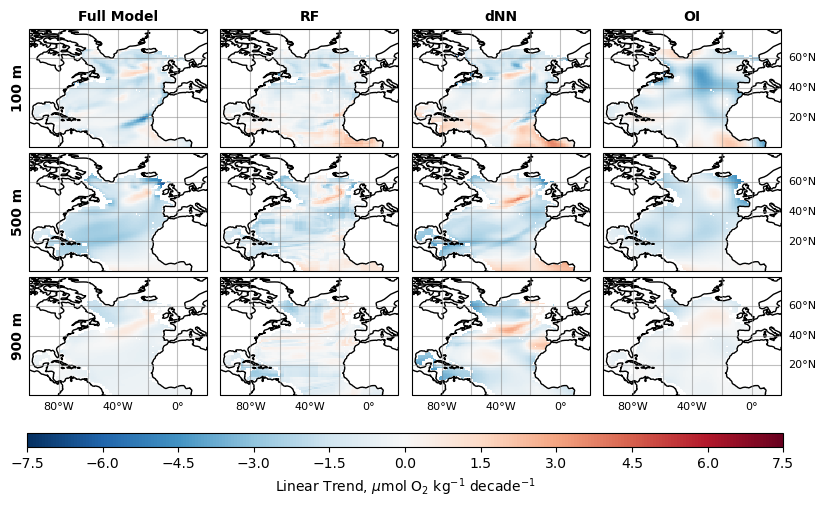

In [5]:
cmin = -7.5
cmax = 7.5

# Trend Plot
fig, axs = plt.subplots(sharex=True,sharey=True,nrows=3,ncols=4,figsize=(8.5,4.75),
                        subplot_kw={'projection': ccrs.PlateCarree()})

zlev = 0
column = 0
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,FullModtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].set_title('Full Model',fontsize=10,fontweight='bold')
axs[zlev,column].annotate('100 m', (-0.1,0.5), xycoords='axes fraction', rotation=90, va='center',fontsize=10,fontweight='bold')

zlev = 1
column = 0
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,FullModtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].annotate('500 m', (-0.1,0.5), xycoords='axes fraction', rotation=90, va='center',fontsize=10,fontweight='bold')

zlev = 2
column = 0
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,FullModtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].annotate('900 m', (-0.1,0.5), xycoords='axes fraction', rotation=90, va='center',fontsize=10,fontweight='bold')

zlev = 0
column = 1
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,RFtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].set_title('RF',fontsize=10,fontweight='bold')

zlev = 1
column = 1
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,RFtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])

zlev = 2
column = 1
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,RFtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])

zlev = 0
column = 2
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,dNNtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].set_title('dNN',fontsize=10,fontweight='bold')

zlev = 1
column = 2
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,dNNtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=False,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])

zlev = 2
column = 2
axs[zlev,column].coastlines()
im=pcm=axs[zlev,column].pcolormesh(x,y,dNNtrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])

zlev = 0
column = 3
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,OItrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.bottom_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])
axs[zlev,column].set_title('OI',fontsize=10,fontweight='bold')

zlev = 1
column = 3
axs[zlev,column].coastlines()
axs[zlev,column].pcolormesh(x,y,OItrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.bottom_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])

zlev = 2
column = 3
axs[zlev,column].coastlines()
im=pcm=axs[zlev,column].pcolormesh(x,y,OItrend[zlev,:,:],shading='auto',transform=ccrs.PlateCarree(),vmin=cmin,vmax=cmax,cmap='RdBu_r')
axs[zlev,column].set_extent([-100,20,0,70])
gl = axs[zlev,column].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',alpha=0.5)
gl.top_labels = False
gl.left_labels = False
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}
gl.ylocator = mticker.FixedLocator([20, 40, 60])


fig.subplots_adjust(left=0.01, wspace=0.05, hspace=0.05)

cbar_ax = fig.add_axes([0.01,0,0.89,0.03])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', aspect='auto',label=r'Linear Trend, $\mu$mol O$_{2}$ kg$^{-1}$ decade$^{-1}$',ticks=np.arange(-7.5,9,1.5))

plt.savefig('/glade/campaign/univ/ugit0034/cmip6/'+model+'/Trend_Maps.pdf',bbox_inches='tight')